In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import xgboost as xgb

from sklearn.metrics import roc_auc_score, mutual_info_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV

In [2]:
df = pd.read_excel('2010 Federal STEM Education Inventory Data Set.xls', skiprows=1)
df.head()

,Index Number,Investment Name,Agency,Subagency,A) Brief Description,B) Year Established,C1) Funding FY2008,C2) Funding FY2009,C3) Funding FY2010,D) Mission-specific or General STEM?,...,Unnamed: 246,Unnamed: 247,Y3) Process or Implementation Evaluation Type,Unnamed: 249,Unnamed: 250,Y4) Portfolio Evaluation/Review Type,Unnamed: 252,Unnamed: 253,Y5) Expert Review Type,Unnamed: 255
0,PRG_0001,Centers for Ocean Sciences Education Excellence ~,National Science Foundation,Directorate for Geosciences (GEO),The Division of Ocean Sciences seeks to establ...,2002.0,5.24,7.19,5.70,General STEM,...,NaN,NaN,NaN,NaN,NO,INDEPENDENT,NaN,NaN,INDEPENDENT,NaN
1,PRG_0002,Broadening Participation in Computing (BPC),National Science Foundation,Directorate for Computer & Information Science...,The BPC Program was not primarily aimed at edu...,2006.0,14.00,14.00,14.00,General STEM,...,NaN,NaN,NaN,NaN,NO,NaN,NaN,NO,NaN,NaN
2,PRG_0003,CISE Pathways to Revitalized Undergraduate Com...,National Science Foundation,Directorate for Computer & Information Science...,Through the CISE Pathways to Revitalized Under...,2007.0,5.00,5.00,4.37,General STEM,...,NaN,NaN,NaN,NaN,NO,NaN,NaN,NO,NaN,NaN
3,PRG_0004,Opportunities for Enhancing Diversity in the G...,National Science Foundation,Directorate for Geosciences (GEO),The Opportunities for Enhancing Diversity in t...,2002.0,4.57,11.79,4.18,General STEM,...,NaN,NO,INDEPENDENT,NaN,NaN,INDEPENDENT,NaN,NaN,INDEPENDENT,NaN
4,PRG_0005,Geoscience Education,National Science Foundation,Directorate for Geosciences (GEO),The Geoscience Education (GeoEd) program is fo...,1999.0,1.63,2.74,2.02,General STEM,...,NaN,NO,NaN,NaN,NO,NaN,NaN,NO,NaN,NaN


In [3]:
#Removing Redundant(Similar Entries)

df.iloc[:,43].replace(to_replace= 'STEM competition', value='Competition',inplace=True)
df.iloc[:,45].replace(to_replace= 'STEM learning program (i.e., after-school, weekend, or summer program)',
                      value='Learning program (i.e., after-school, weekend, or summer program)',inplace=True)
df.iloc[:,50].replace(to_replace= 'Implementation of assessment', value='Assessment implementation',inplace=True)
df.iloc[:,51].replace(to_replace= 'Development of assessment', value='Assessment development',inplace=True)
df.iloc[:,52].replace(to_replace= 'Institutional support for infrastructure (to strengthen STEM education capabilities though expansion of facilities, classrooms, technology, and other physical infrastructure)',
                      value='Infrastructure support',inplace=True)
df.iloc[:,53].replace(to_replace= 'Institutional support for leadership, management, and administrative activities', 
                      value='Administrative support',inplace=True)
df.iloc[:,56].replace(to_replace= 'Grades 6-20 aged learners', value='Pre-K-20 learners',inplace=True)
df.iloc[:,58].replace(to_replace= 'Elementary school (K-5) aged learners', value='Elementary school (K-5)',inplace=True)
df.iloc[:,59].replace(to_replace= 'Middle school (6-8) aged learners', value='Middle (6-8)',inplace=True)
df.iloc[:,60].replace(to_replace= 'High school (9-12) aged learners', value='High school (9-12)',inplace=True)
df.iloc[:,61].replace(to_replace= 'Undergraduate school (13-16) aged learners',
                      value='Undergraduate (13-16)',inplace=True)
df.iloc[:,62].replace(to_replace= 'Graduate school (17-20) aged learners', value='Graduate (17-20)',inplace=True)
df.iloc[:,63].replace(to_replace= 'K-12 classroom teachers', value='K-12 Classroom Teachers',inplace=True)
df.iloc[:,64].replace(to_replace= 'Pre-service-service', value='Pre-service',inplace=True)
df.iloc[:,74].replace(to_replace= 'Adult learners (other than educators, education, leaders, education researchers or policy makers)',
                      value='Adult learners (other than educators, education leaders, education researchers, or policy makers)',inplace=True)
df.iloc[:,76].replace(to_replace= 'K-12 staff/ leaders/ administrators',
                      value='K-12 staff/leaders/administrators',inplace=True)
df.iloc[:,86].replace(to_replace= 'Undergraduate (13-16)', value='Undergraduate',inplace=True)
df.iloc[:,87].replace(to_replace= 'Graduate (17-20)', value='Graduate',inplace=True)
df.iloc[:,89].replace(to_replace= 'Informal STEM educators', value='Informal STEM Educators',inplace=True)
df.iloc[:,90].replace(to_replace= 'Informal STEM education leaders/program developers Policy makers',
                      value='Informal STEM education leaders/program developers',inplace=True)
df.iloc[:,112].replace(to_replace= 'no', value='No',inplace=True)
df.iloc[:,119].replace(to_replace= 'national scope or not targeted to a geographic region',
                       value='National scope or not targeted to a geographic region',inplace=True)
df.iloc[:,136].replace(to_replace= 'Science - Computer science', value='Science - Computer Science',inplace=True)
df.iloc[:,159].replace(to_replace= ['Cooperative agreements', 'Competitive (Cooperative Agreements)',
                                   'Competitive cooperative agreement', 'Competitive Cooperative Agreements',
                                   'Cooperative agreement', 'Cooperative Agreements', 
                                   'Competitive (cooperative agreement)', 'Cooperative Agreement',
                                   'It is via a competitive cooperative agreement.'], 
                       value=['Competitive Cooperative Agreement']*9,inplace=True)
df.iloc[:,164].replace(to_replace= "Don't know", value="Don't Know",inplace=True)
df.iloc[:,213].replace(to_replace= "Number of adults served", value="Number of Adults Served", inplace=True)
df.iloc[:,214].replace(to_replace= "Number of K-12 schools served", value="Number of K-12 Schools Served",
                       inplace=True)
df.iloc[:,215].replace(to_replace= "Number of K-12 schools served", value="Number of K-12 Schools Served",
                       inplace=True)
df.iloc[:,225].replace(to_replace= ['none', 'NONE'], value=['None', 'None'],inplace=True)
df.iloc[:,230].replace(to_replace= "Number or percent of learners who took a job in a STEM field", 
                       value='Number of participants employed in STEM fields', inplace=True)
df.iloc[:,244].replace(to_replace= ['no', 'NO'], value=['No', 'No'],inplace=True)

In [4]:
cleaned_df = pd.DataFrame([], index=df['Index Number'])
cleaned_df = df.copy()

In [5]:
#Encoding categorical variables

for c in cleaned_df.columns:
    if cleaned_df[c].dtype == 'object':
        lbl = LabelEncoder()
        lbl.fit(list(cleaned_df[c].values))
        cleaned_df[c] = lbl.transform(list(cleaned_df[c].values))
        
cleaned_df.head()

,Index Number,Investment Name,Agency,Subagency,A) Brief Description,B) Year Established,C1) Funding FY2008,C2) Funding FY2009,C3) Funding FY2010,D) Mission-specific or General STEM?,...,Unnamed: 246,Unnamed: 247,Y3) Process or Implementation Evaluation Type,Unnamed: 249,Unnamed: 250,Y4) Portfolio Evaluation/Review Type,Unnamed: 252,Unnamed: 253,Y5) Expert Review Type,Unnamed: 255
0,0,31,10,12,92,2002.0,5.24,7.19,5.70,1,...,1,1,1,1,0,0,1,1,0,1
1,1,23,10,9,76,2006.0,14.00,14.00,14.00,1,...,1,1,1,1,0,1,1,0,1,1
2,2,26,10,9,240,2007.0,5.00,5.00,4.37,1,...,1,1,1,1,0,1,1,0,1,1
3,3,174,10,12,163,2002.0,4.57,11.79,4.18,1,...,1,0,0,1,1,0,1,1,0,1
4,4,72,10,12,107,1999.0,1.63,2.74,2.02,1,...,1,0,1,1,0,1,1,0,1,1


In [6]:
def merge(x):
    a = ''
    for col in x:
        a = a + str(col)
    return a

In [7]:
cols = cleaned_df.columns
X = [cols[12:21], cols[22:27], cols[27:32], cols[32:37], cols[37:55], cols[56:64], cols[64:69], cols[69:74],
    cols[74], cols[75], cols[76:81], cols[81:85], cols[85:89], cols[89], cols[90], cols[91:92], cols[93:108],
    cols[108:112], cols[112:119], cols[119:129], cols[129:141], cols[142:153], cols[154:160], cols[160], 
    cols[161:174], cols[174:186], cols[186], cols[187:210], cols[210:224], cols[225:237], cols[241],
    cols[242:245], cols[245:248], cols[248:251], cols[251:254], cols[254:256]] 
names = ['F2', 'G1', 'G2', 'G3', 'H', 'I1', 'I2', 'I3','I4', 'I5', 'I6', 'I7', 'I8', 'I9', 'I10', 'I11', 'J', 'K',
         'L', 'M', 'N', 'O', 'P', 'Q', 'R1', 'R2', 'S', 'T', 'U', 'V', 'X', 'Y1', 'Y2', 'Y3', 'Y4', 'Y5']

In [8]:
#Merging Data under different sub-columns

ndf = pd.DataFrame([], index=df['Index Number'])
for x, name in zip(X,names):
    temp = cleaned_df[x].fillna(500).astype('int64')
    if str(type(temp)) == "<class 'pandas.core.frame.DataFrame'>":
        temp2 = temp.apply(merge, axis=1)
    else:
        temp2 = temp.astype('str')
    lbl = LabelEncoder()
    ndf[name] = lbl.fit_transform(list(temp2.values))
ndf.head()

,F2,G1,G2,G3,H,I1,I2,I3,I4,I5,...,S,T,U,V,X,Y1,Y2,Y3,Y4,Y5
Index Number,,,,,,,,,,,,,,,,,,,,,
PRG_0001,3,12,25,6,26,31,1,2,0,1,...,3,48,89,53,1,1,1,3,1,1
PRG_0002,36,18,20,5,5,11,8,9,1,1,...,0,25,89,53,1,3,1,3,3,3
PRG_0003,90,6,9,27,78,32,8,9,1,0,...,0,18,83,1,1,1,1,3,3,3
PRG_0004,33,16,14,13,107,5,1,2,0,0,...,0,16,32,7,1,3,3,1,1,1
PRG_0005,59,14,16,13,24,5,4,2,0,1,...,0,14,90,1,1,3,3,3,3,3


## Calculating Percentage Growth of Fundings b/w 2008 and 2009

In [9]:
def growth_calc(X):
    if X['C1) Funding FY2008']>0:
        return ((X['C2) Funding FY2009'] - X['C1) Funding FY2008'])/X['C1) Funding FY2008'])*100
    return 1
ndf['% Growth'] = df.apply(growth_calc, axis=1).values

## Preparing Target Variable

In [10]:
def target(X):
    if X['% Growth']>= 0:
        return 1
    else:
        return 0
ndf['Target'] = ndf.apply(target, axis=1)

# Plotting

#### Note: While plotting these charts NULL values have been ignored

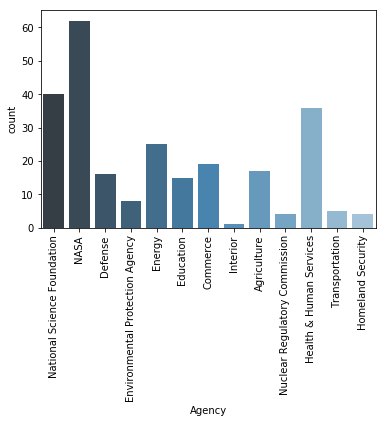

In [11]:
#Agency
plot = sns.countplot(x="Agency", data=df, palette="Blues_d")
plot.set_xticklabels(plot.get_xticklabels(), rotation=90);

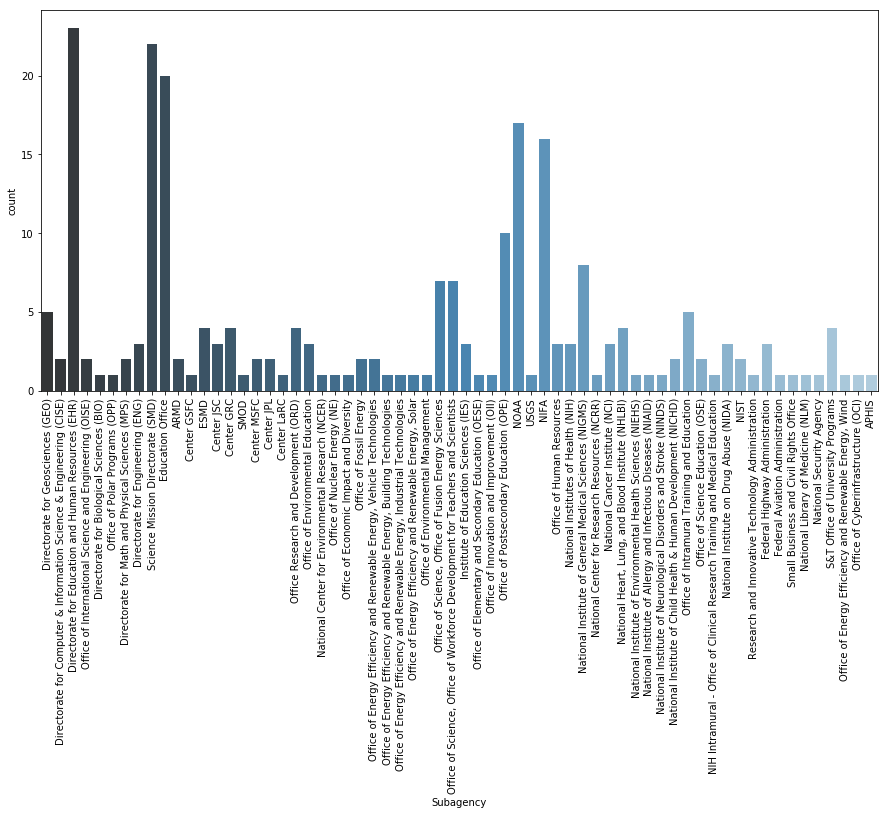

In [12]:
#Subagency
plt.figure(figsize=(15,7))
plot = sns.countplot(x="Subagency", data=df, palette="Blues_d")
plot.set_xticklabels(plot.get_xticklabels(), rotation=90);
plt.show()

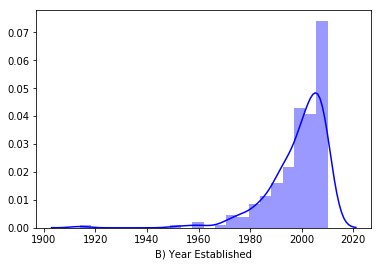

In [13]:
#YearEstablished
plt.figure()
sns.distplot(df.iloc[:,5].dropna(), color='b')
plt.show()

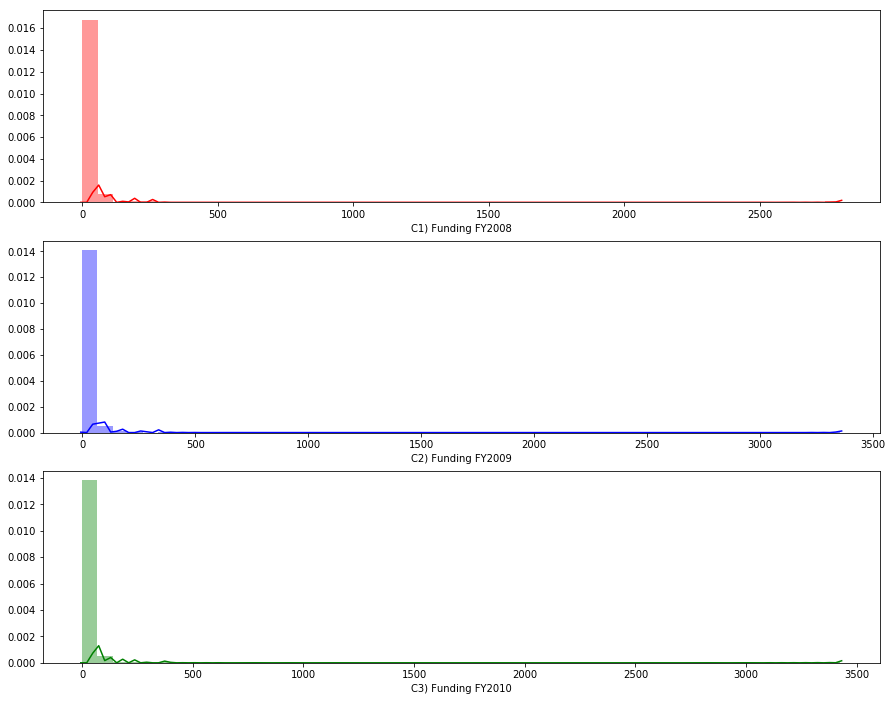

In [14]:
#Funding
plt.figure(figsize=(15,12))
plt.subplot(3,1,1,)
sns.distplot(df.iloc[:,6].dropna(), color='r')
plt.subplot(3,1,2)
sns.distplot(df.iloc[:,7].dropna(), color='b')
plt.subplot(3,1,3)
sns.distplot(df.iloc[:,8].dropna(), color='g')
plt.show()

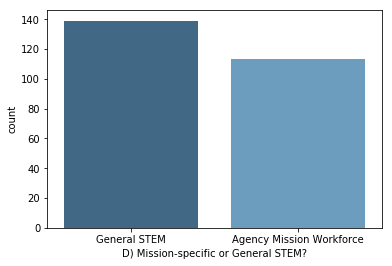

In [15]:
#Mission Specific or General STEM
sns.countplot(x="D) Mission-specific or General STEM?", data=df, palette="Blues_d");

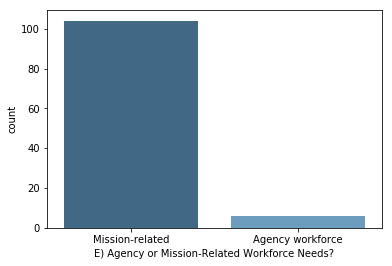

In [16]:
#Agency or Mission-Related Workforce Needs?
sns.countplot(x="E) Agency or Mission-Related Workforce Needs?", data=df, palette="Blues_d");

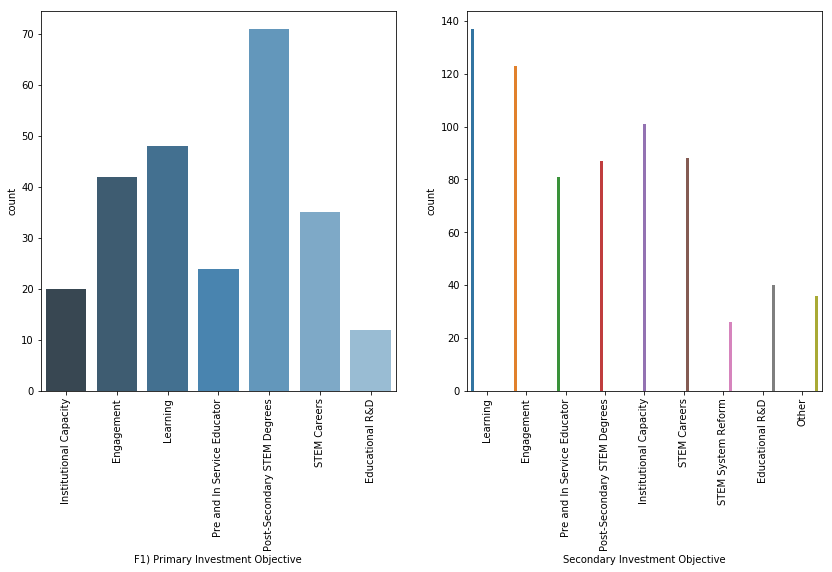

In [17]:
#Investment Objective
plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
plot = sns.countplot(x="F1) Primary Investment Objective", data=df, palette="Blues_d");
plot.set_xticklabels(['Institutional Capacity','Engagement', 'Learning', 'Pre and In Service Educator',
                     'Post-Secondary STEM Degrees', 'STEM Careers', 'Educational R&D'],
                     rotation=90);


plt.subplot(1,2,2)
names = ['Learning' ,'Engagement', 'Pre and In Service Educator', 'Post-Secondary STEM Degrees',
         'Institutional Capacity', 'STEM Careers', 'STEM System Reform', 'Educational R&D', "Other",
         'Industry Driven']

plot = sns.countplot(x='variable', hue='value', data=pd.melt(df.iloc[:,12:21]))
plot.set_xticklabels(names, rotation=90);
plot.legend_.remove()
plot.set(xlabel='Secondary Investment Objective')
plt.show()

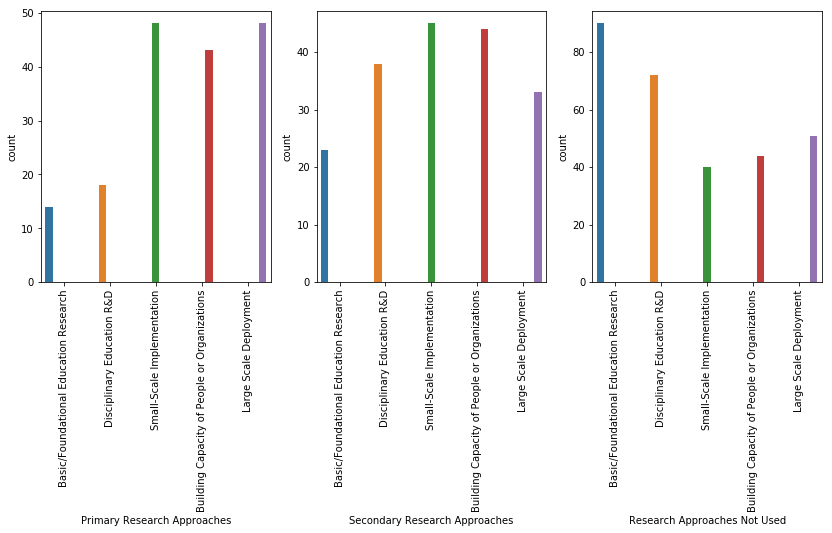

In [18]:
#Research Approaches

names = ['Basic/Foundational Education Research', 'Disciplinary Education R&D', 'Small-Scale Implementation',
        'Building Capacity of People or Organizations', 'Large Scale Deployment'] 

plt.figure(figsize=(14,5))
plt.subplot(1,3,1)
plot = sns.countplot(x='variable', hue='value', data=pd.melt(df.iloc[:,22:27]))
plot.set_xticklabels(names, rotation=90);
plot.legend_.remove()
plot.set(xlabel='Primary Research Approaches')


plt.subplot(1,3,2)
plot = sns.countplot(x='variable', hue='value', data=pd.melt(df.iloc[:,27:32]))
plot.set_xticklabels(names, rotation=90);
plot.legend_.remove()
plot.set(xlabel='Secondary Research Approaches')

plt.subplot(1,3,3)
plot = sns.countplot(x='variable', hue='value', data=pd.melt(df.iloc[:,32:37]))
plot.set_xticklabels(names, rotation=90);
plot.legend_.remove()
plot.set(xlabel='Research Approaches Not Used')

plt.show()

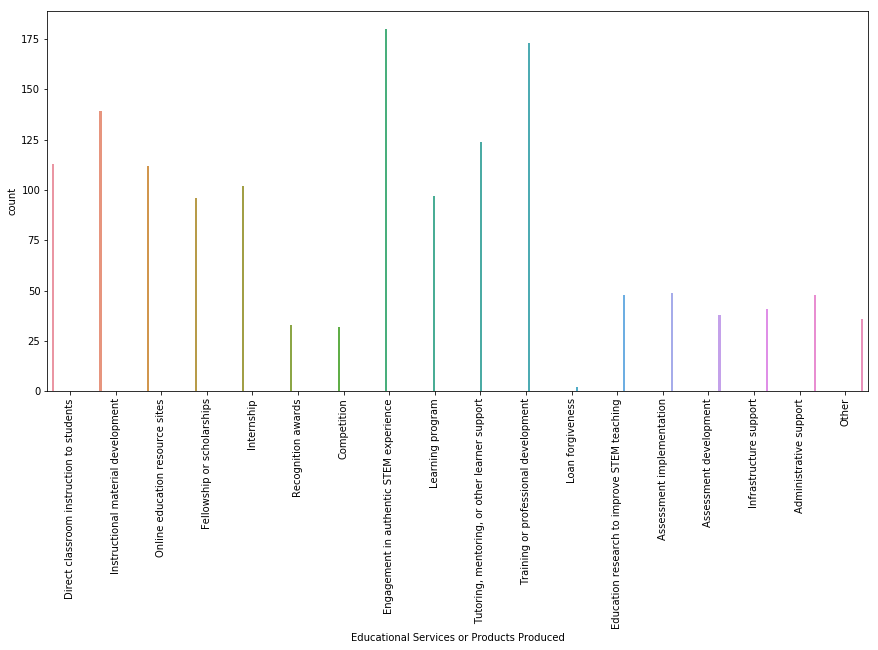

In [19]:
#Educational Services or Products Produced

names = ['Direct classroom instruction to students', 'Instructional material development', 
         'Online education resource sites', 'Fellowship or scholarships', 'Internship', 'Recognition awards',
         'Competition', 'Engagement in authentic STEM experience', 'Learning program', 
         'Tutoring, mentoring, or other learner support', 'Training or professional development',
         'Loan forgiveness', 'Education research to improve STEM teaching', 'Assessment implementation',
         'Assessment development', 'Infrastructure support', 'Administrative support', 'Other'] 

plt.figure(figsize=(50,7))
plt.subplot(1,3,1)
plot = sns.countplot(x='variable', hue='value', data=pd.melt(df.iloc[:,37:55]))
plot.set_xticklabels(names, rotation=90);
plot.legend_.remove()
plot.set(xlabel='Educational Services or Products Produced')
plt.show()

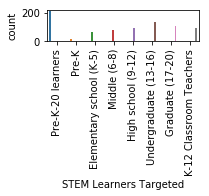

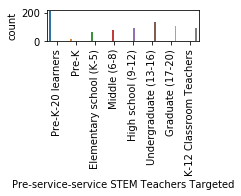

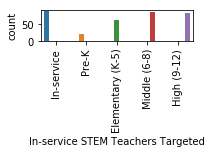

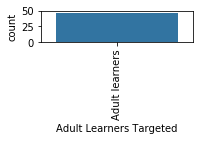

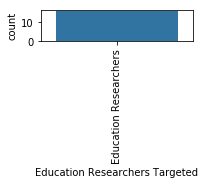

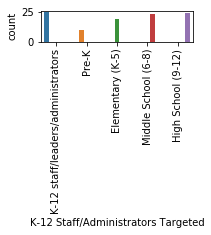

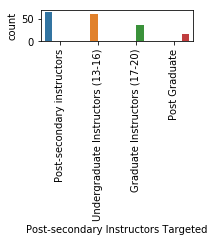

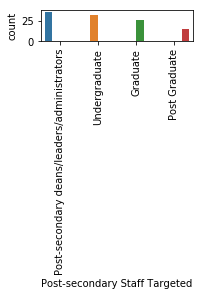

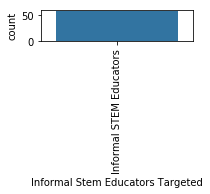

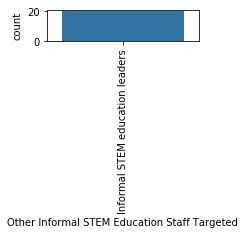

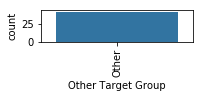

In [20]:
#I1

names = ['Pre-K-20 learners', 'Pre-K', 'Elementary school (K-5)', 'Middle (6-8)', 'High school (9-12)', 
         'Undergraduate (13-16)', 'Graduate (17-20)', 'K-12 Classroom Teachers'] 

plt.subplot(6,2,1)
plot = sns.countplot(x='variable', hue='value', data=pd.melt(df.iloc[:,56:64]))
plot.set_xticklabels(names, rotation=90);
plot.legend_.remove()
plot.set(xlabel='STEM Learners Targeted')
plt.show()

#I2

name = ['Pre-service', 'Pre-K', 'Elementary (K-5)', 'Middle (6-8)', 'High (9-12)']
plt.subplot(6,2,2)
plot = sns.countplot(x='variable', hue='value', data=pd.melt(df.iloc[:,56:64]))
plot.set_xticklabels(names, rotation=90);
plot.legend_.remove()
plot.set(xlabel='Pre-service-service STEM Teachers Targeted')
plt.show()

#I3

name = ['In-service', 'Pre-K', 'Elementary (K-5)', 'Middle (6-8)', 'High (9-12)']
plt.subplot(6,2,3)
plot = sns.countplot(x='variable', hue='value', data=pd.melt(df.iloc[:,69:74]))
plot.set_xticklabels(name, rotation=90);
plot.legend_.remove()
plot.set(xlabel='In-service STEM Teachers Targeted')
plt.show()

#I4

name = ['Adult learners']
plt.subplot(6,2,4)
plot = sns.countplot(x='I4) Adult Learners Targeted?', data=df)
plot.set_xticklabels(name, rotation=90);
plot.set(xlabel='Adult Learners Targeted')
plt.show()

#I5

name = ['Education Researchers']
plt.subplot(6,2,5)
plot = sns.countplot(x='I5) Education Researchers Targeted? ', data=df)
plot.set_xticklabels(name, rotation=90);
plot.set(xlabel='Education Researchers Targeted')
plt.show()

#I6

name = ['K-12 staff/leaders/administrators', 'Pre-K', 'Elementary (K-5)', 'Middle School (6-8)',
        'High School (9-12)']
plt.subplot(6,2,6)
plot = sns.countplot(x='variable', hue='value', data=pd.melt(df.iloc[:,76:81]))
plot.set_xticklabels(name, rotation=90);
plot.set(xlabel='K-12 Staff/Administrators Targeted')
plot.legend_.remove()
plt.show()

#I7

name = ['Post-secondary instructors', 'Undergraduate Instructors (13-16)', 'Graduate Instructors (17-20)',
        'Post Graduate']
plt.subplot(6,2,7)
plot = sns.countplot(x='variable', hue='value', data=pd.melt(df.iloc[:,81:85]))
plot.set_xticklabels(name, rotation=90);
plot.set(xlabel='Post-secondary Instructors Targeted')
plot.legend_.remove()
plt.show()

#I8

name = ['Post-secondary deans/leaders/administrators', 'Undergraduate', 'Graduate', 'Post Graduate']
plt.subplot(6,2,8)
plot = sns.countplot(x='variable', hue='value', data=pd.melt(df.iloc[:,85:89]))
plot.set_xticklabels(name, rotation=90);
plot.set(xlabel='Post-secondary Staff Targeted')
plot.legend_.remove()
plt.show()

#I9

name = ['Informal STEM Educators']
plt.subplot(6,2,9)
plot = sns.countplot(x='I9) Informal Stem Educators Targeted?', data=df)
plot.set_xticklabels(name, rotation=90);
plot.set(xlabel='Informal Stem Educators Targeted')
plt.show()

#I10

name = ['Informal STEM education leaders']
plt.subplot(6,2,10)
plot = sns.countplot(x='I10) Other Informal STEM Education Staff Targeted?', data=df)
plot.set_xticklabels(name, rotation=90);
plot.set(xlabel='Other Informal STEM Education Staff Targeted')
plt.show()

#I11

name = ['Other']
plt.subplot(6,2,11)
plot = sns.countplot(x='I11) Other Target Group?', data=df)
plot.set_xticklabels(name, rotation=90);
plot.set(xlabel='Other Target Group')
plt.show()

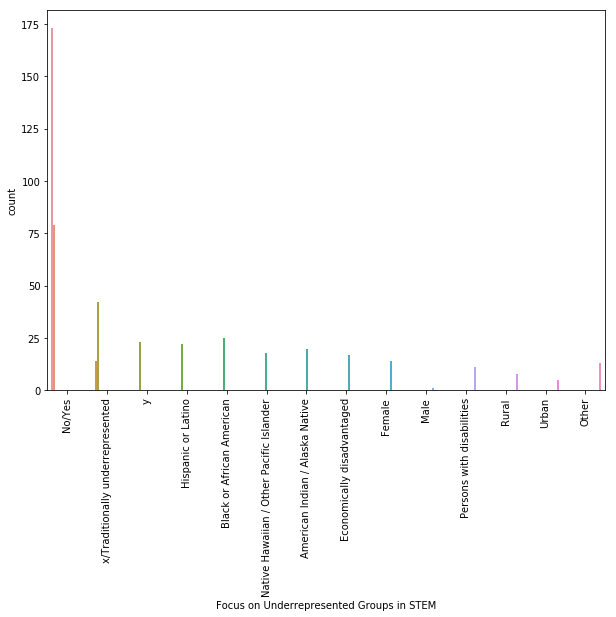

In [21]:
#J

names = ['No/Yes', 'x/Traditionally underrepresented', 'y', 'Hispanic or Latino',
         'Black or African American', 'Native Hawaiian / Other Pacific Islander', 'American Indian / Alaska Native',
         'Economically disadvantaged', 'Female', 'Male', 'Persons with disabilities', 'Rural', 'Urban', 'Other'] 

plt.figure(figsize=(10,7))
plot = sns.countplot(x='variable', hue='value', data=pd.melt(df.iloc[:,93:107]))
plot.set_xticklabels(names, rotation=90);
plot.legend_.remove()
plot.set(xlabel='Focus on Underrepresented Groups in STEM')
plt.show()

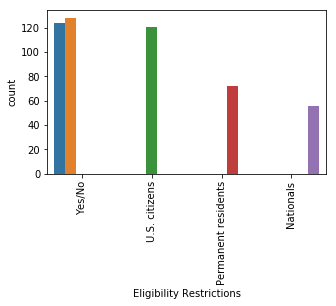

In [22]:
#Eligibility Restrictions

names = ['Yes/No', 'U.S. citizens', 'Permanent residents', 'Nationals']

plt.figure(figsize=(5,3))
plot = sns.countplot(x='variable', hue='value', data=pd.melt(df.iloc[:,108:112]))
plot.set_xticklabels(names, rotation=90);
plot.legend_.remove()
plot.set(xlabel='Eligibility Restrictions')
plt.show()

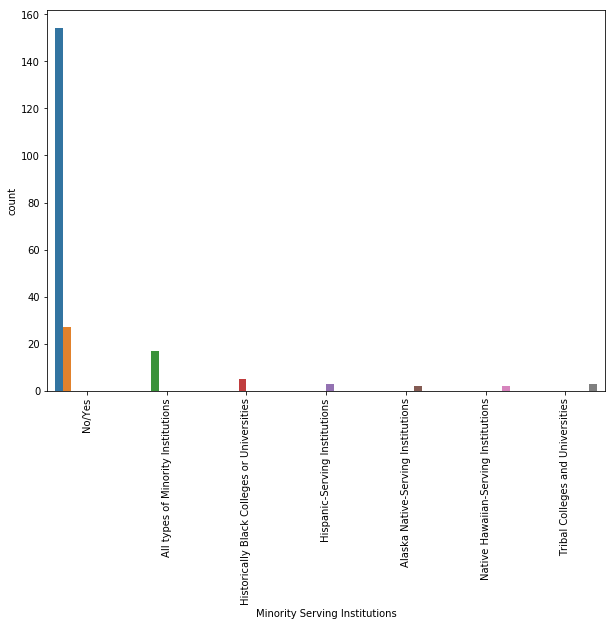

In [23]:
#Minority Serving Institutions

names  = ['No/Yes', 'All types of Minority Institutions', 'Historically Black Colleges or Universities',
          'Hispanic-Serving Institutions', 'Alaska Native-Serving Institutions',
          'Native Hawaiian-Serving Institutions', 'Tribal Colleges and Universities']

plt.figure(figsize=(10,7))
plot = sns.countplot(x='variable', hue='value', data=pd.melt(df.iloc[:,112:119]))
plot.set_xticklabels(names, rotation=90);
plot.legend_.remove()
plot.set(xlabel='Minority Serving Institutions')
plt.show()

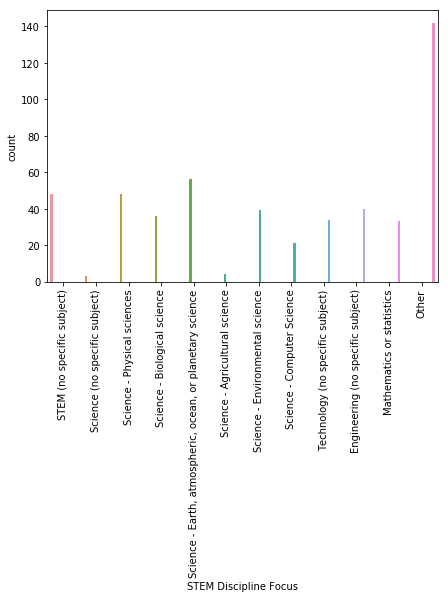

In [24]:
#STEM Discipline Focus

name = ['STEM (no specific subject)',
         'Science (no specific subject)',
         'Science - Physical sciences',
         'Science - Biological science',
         'Science - Earth, atmospheric, ocean, or planetary science',
         'Science - Agricultural science',
         'Science - Environmental science',
         'Science - Computer Science',
         'Technology (no specific subject)',
         'Engineering (no specific subject)',
         'Mathematics or statistics',
         'Other']

plt.figure(figsize=(7,5))
plot = sns.countplot(x='variable', hue='value', data=pd.melt(df.iloc[:,129:141]))
plot.set_xticklabels(name, rotation=90);
plot.legend_.remove()
plot.set(xlabel='STEM Discipline Focus')
plt.show()

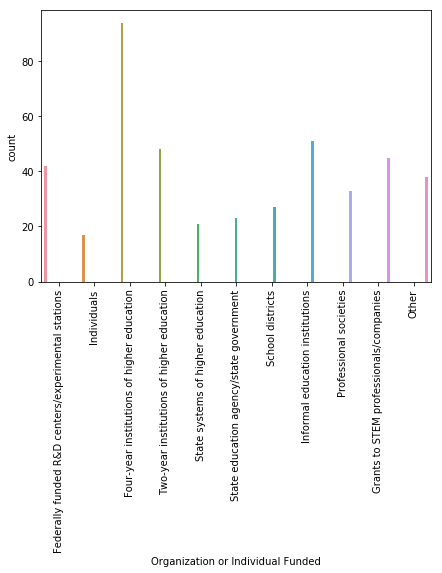

In [25]:
#Organization or Individual Funded

name =  ['Federally funded R&D centers/experimental stations',
         'Individuals',
         'Four-year institutions of higher education',
         'Two-year institutions of higher education',
         'State systems of higher education',
         'State education agency/state government',
         'School districts',
         'Informal education institutions',
         'Professional societies',
         'Grants to STEM professionals/companies',
         'Other']

plt.figure(figsize=(7,5))
plot = sns.countplot(x='variable', hue='value', data=pd.melt(df.iloc[:,142:153]))
plot.set_xticklabels(name, rotation=90);
plot.legend_.remove()
plot.set(xlabel='Organization or Individual Funded')
plt.show()

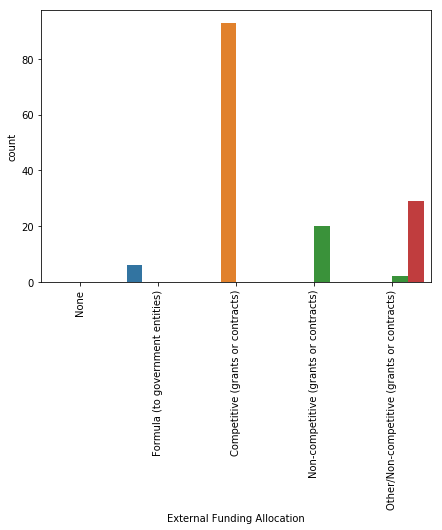

In [26]:
#External Funding Allocation

name = ['None',
        'Formula (to government entities)',
        'Competitive (grants or contracts)',
        'Non-competitive (grants or contracts)',
        'Other/Non-competitive (grants or contracts)']


plt.figure(figsize=(7,5))
plot = sns.countplot(x='variable', hue='value', data=pd.melt(df.iloc[:,154:159]))
plot.set_xticklabels(name, rotation=90);
plot.legend_.remove()
plot.set(xlabel='External Funding Allocation')
plt.show()

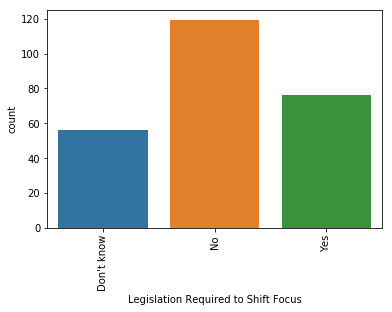

In [27]:
#Legislation Required to Shift Focus

name = ["Don't know", 'No', 'Yes']

plot = sns.countplot(x='Q) Legislation Required to Shift Focus?', data=df)
plot.set_xticklabels(name, rotation=90);
plot.set(xlabel='Legislation Required to Shift Focus')
plt.show()


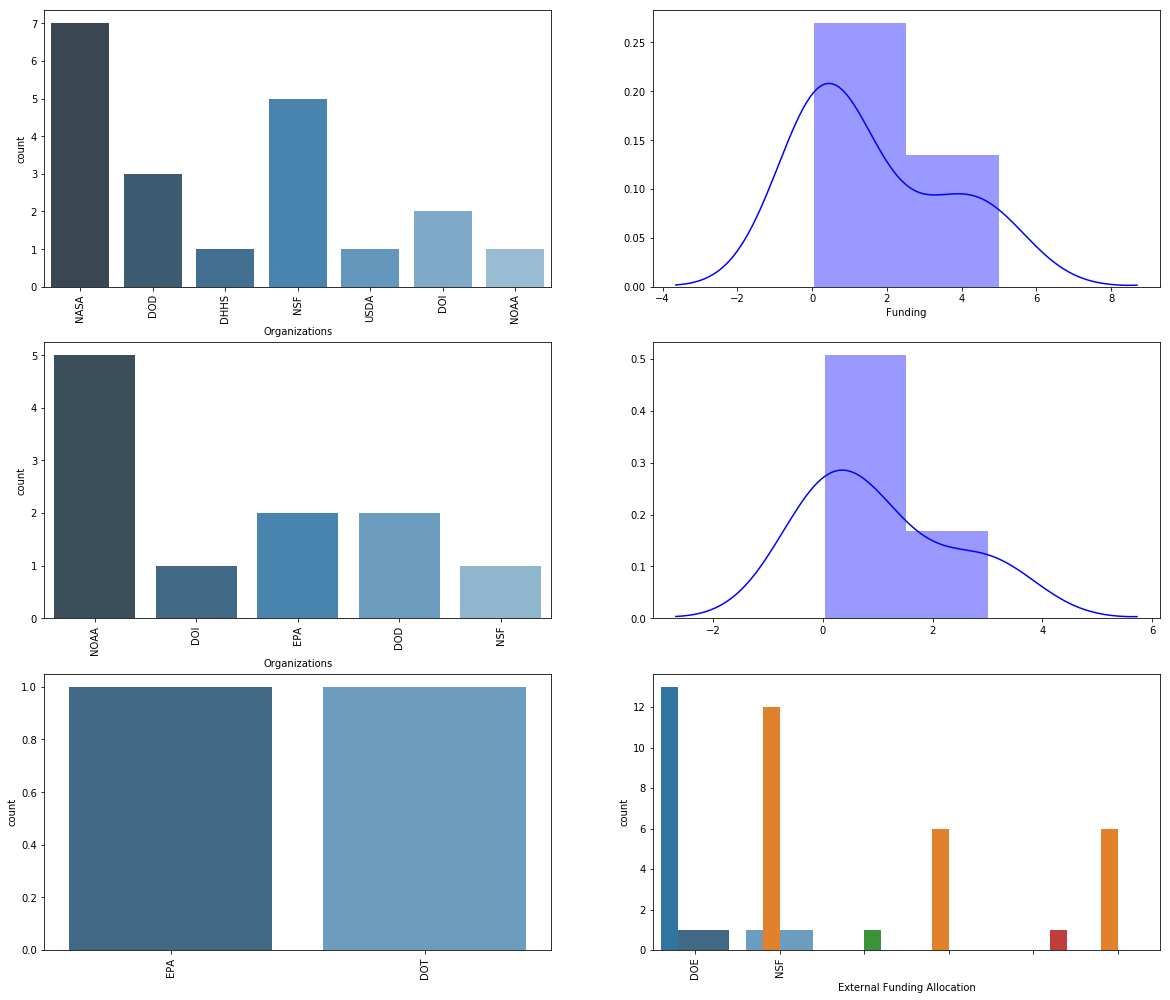

In [28]:

name = ['NASA', 'DOD', 'DHHS', 'NSF', 'USDA', 'DOI', 'NOAA']

plt.figure(figsize=(20,60))
plt.subplot(10,2,1)
plot = sns.countplot(x="Unnamed: 162", data=df, palette="Blues_d");
plot.set_xticklabels(name, rotation=90);
plot.set(xlabel='Organizations')


plt.subplot(10,2,2)
plot = sns.distplot(df.iloc[:,163].dropna(), color='b');
plot.set(xlabel='Funding')


name = ['NOAA', 'DOI', 'EPA', 'DOD', 'NSF']
plt.subplot(10,2,3)
plot = sns.countplot(x="Unnamed: 165", data=df, palette="Blues_d");
plot.set_xticklabels(name, rotation=90);
plot.set(xlabel='Organizations')

plt.subplot(10,2,4)
plot = sns.distplot(df.iloc[:,166].dropna(), color='b');
plot.set(xlabel='')

name = ['EPA', 'DOT']
plt.subplot(10,2,5)
plot = sns.countplot(x="Unnamed: 168", data=df, palette="Blues_d");
plot.set_xticklabels(name, rotation=90);
plot.set(xlabel='')


name = ['DOE', 'NSF']
plt.subplot(10,2,6)
plot = sns.countplot(x="Unnamed: 171", data=df, palette="Blues_d");
plot.set_xticklabels(name, rotation=90);
plot.set(xlabel='')


plot = sns.countplot(x='variable', hue='value', data=pd.melt(df.iloc[:,[164,167,169,170,172,173]]))
plot.set_xticklabels(name, rotation=90);
plot.legend_.remove()
plot.set(xlabel='External Funding Allocation')
plt.show()

#### Similarly Plotting for remaining variables can also be done

### Mutual Info Score

In [29]:
mi_score = []
for col in ndf.columns:
    mi_score.append([col, mutual_info_score(ndf[col],ndf['Target'])])

In [30]:
mi_score.sort(key=lambda x: float(x[1]))
mi_score

[['I5', 6.865568990909593e-05],
 ['I10', 0.002150793005352203],
 ['I4', 0.002377931703696823],
 ['I9', 0.00246762137464282],
 ['I11', 0.00256971012839996],
 ['I6', 0.002961103779738669],
 ['Y2', 0.0033810584173158964],
 ['K', 0.005686356123544376],
 ['Y3', 0.006882068048940551],
 ['X', 0.007444726708957031],
 ['L', 0.009804647670845892],
 ['Y1', 0.010934688459105849],
 ['Y5', 0.01155741379903684],
 ['I2', 0.011924784674172934],
 ['Y4', 0.012860372745143088],
 ['I3', 0.015806068126683857],
 ['I7', 0.01599736033600343],
 ['S', 0.017260618276791675],
 ['Q', 0.018569757741870568],
 ['I8', 0.02459027125266331],
 ['M', 0.03213945567619182],
 ['R2', 0.03506080103642102],
 ['R1', 0.039567846569716125],
 ['P', 0.04654357430861998],
 ['G1', 0.05387321967269697],
 ['I1', 0.05589461652505298],
 ['G2', 0.057191574242727444],
 ['J', 0.07079825168183389],
 ['G3', 0.0797427477472303],
 ['V', 0.11069826928371192],
 ['N', 0.14899033242757803],
 ['O', 0.1726888672072056],
 ['T', 0.1918344146991398],
 ['U

### XGBoost

In [31]:
X = np.hstack((cleaned_df[['Agency', 'B) Year Established', 'C1) Funding FY2008']].values,
               ndf.iloc[:,:-2].values))
y = ndf['Target']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_tr, X_te, y_tr, y_te = train_test_split(X_train, y_train, test_size=0.3, random_state=0)

In [33]:
params={
    'n_estimators':500,
    'objective': 'binary:logistic',
    'learning_rate': 0.05,
    'gamma':0.1,
    'subsample':0.8,
    'colsample_bytree':0.3,
    'min_child_weight':3,
    'max_depth':6,
    'seed':1024,
    }

In [34]:
clf = xgb.XGBClassifier(**params)
clf.fit(X_tr, y_tr, 
        eval_set=[(X_te, y_te)], 
        eval_metric='auc', early_stopping_rounds = 50)

[0]	validation_0-auc:0.625
Will train until validation_0-auc hasn't improved in 50 rounds.
[1]	validation_0-auc:0.688636
[2]	validation_0-auc:0.645455
[3]	validation_0-auc:0.694318
[4]	validation_0-auc:0.663636
[5]	validation_0-auc:0.693182
[6]	validation_0-auc:0.676136
[7]	validation_0-auc:0.65
[8]	validation_0-auc:0.642045
[9]	validation_0-auc:0.630682
[10]	validation_0-auc:0.657955
[11]	validation_0-auc:0.626136
[12]	validation_0-auc:0.642045
[13]	validation_0-auc:0.651136
[14]	validation_0-auc:0.638636
[15]	validation_0-auc:0.636364
[16]	validation_0-auc:0.636364
[17]	validation_0-auc:0.634091
[18]	validation_0-auc:0.634091
[19]	validation_0-auc:0.629545
[20]	validation_0-auc:0.634091
[21]	validation_0-auc:0.618182
[22]	validation_0-auc:0.595455
[23]	validation_0-auc:0.572727
[24]	validation_0-auc:0.584091
[25]	validation_0-auc:0.584091
[26]	validation_0-auc:0.604545
[27]	validation_0-auc:0.595455
[28]	validation_0-auc:0.579545
[29]	validation_0-auc:0.584091
[30]	validation_0-auc:0

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.3, gamma=0.1, learning_rate=0.05,
       max_delta_step=0, max_depth=6, min_child_weight=3, missing=None,
       n_estimators=500, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=1024, silent=True,
       subsample=0.8)

In [35]:
param_test1 = {'max_depth':range(1,25), 
               'min_child_weight':range(1,25)
              }

In [36]:
gsearch = GridSearchCV(estimator = xgb.XGBClassifier(), 
                       param_grid = param_test1, scoring='roc_auc',n_jobs=-1, cv=5, verbose=True,
                       return_train_score = True)
gsearch.fit(X_tr, y_tr)

print('Best Params\nmax_depth:{} \nmin_child_weight:{}'.format(gsearch.best_estimator_.max_depth, gsearch.best_estimator_.min_child_weight))
print('Best Train Score:', gsearch.best_score_)
print('Validation Score: ', gsearch.score(X_te,y_te))

Fitting 5 folds for each of 576 candidates, totalling 2880 fits


[Parallel(n_jobs=-1)]: Done 232 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 2032 tasks      | elapsed:    4.7s


Best Params
max_depth:1 
min_child_weight:1
Best Train Score: 0.7031949793182142
Validation Score:  0.7181818181818181


[Parallel(n_jobs=-1)]: Done 2880 out of 2880 | elapsed:    6.6s finished


In [37]:
param_test1 = {'max_depth': [1], 
               'min_child_weight': [1],
               'colsample_bytree': [i/10. for i in range(1,11)],
               'subsample' : [i/10. for i in range(1,11)]
              }

In [38]:
gsearch = GridSearchCV(estimator = xgb.XGBClassifier(), 
                       param_grid = param_test1, scoring='roc_auc',n_jobs=-1, cv=5, verbose=True,
                       return_train_score = True)
gsearch.fit(X_tr, y_tr)

print('Best Params\ncolsample_bytree:{} \ncolsample_bytree:{}'.format(gsearch.best_estimator_.colsample_bytree, gsearch.best_estimator_.subsample))
print('Best Train Score:', gsearch.best_score_)
print('Validation Score: ', gsearch.score(X_te,y_te))

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Done 268 tasks      | elapsed:    0.6s


Best Params
colsample_bytree:0.7 
colsample_bytree:0.9
Best Train Score: 0.7237127371273712
Validation Score:  0.7159090909090908


[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.0s finished


In [39]:
param_test1 = {'max_depth': [1], 
               'min_child_weight': [1],
               'colsample_bytree': [0.7],
               'subsample' : [0.9],
               'learning_rate' : [.3, .2, .1, .03, .01, .003, .001, .0005]
              }

In [40]:
gsearch = GridSearchCV(estimator = xgb.XGBClassifier(), 
                       param_grid = param_test1, scoring='roc_auc',n_jobs=-1, cv=5, verbose=True,
                       return_train_score = True)
gsearch.fit(X_tr, y_tr)

print('Best Params\nlearning_rate:{}'.format(gsearch.best_estimator_.learning_rate))
print('Best Train Score:', gsearch.best_score_)
print('Validation Score: ', gsearch.score(X_te,y_te))

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Params
learning_rate:0.1
Best Train Score: 0.7237127371273712
Validation Score:  0.7159090909090908


[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.2s finished


In [41]:
param_test1 = {'max_depth': [1], 
               'min_child_weight': [1],
               'colsample_bytree': [1],
               'subsample' : [0.9],
               'learning_rate' : [.1],
               'gamma' : [i/100. for i in range(1,101)]
              }

In [42]:
gsearch = GridSearchCV(estimator = xgb.XGBClassifier(), 
                       param_grid = param_test1, scoring='roc_auc',n_jobs=-1, cv=5, verbose=True,
                       return_train_score = True)
gsearch.fit(X_tr, y_tr)

print('Best Params\ngamma:{}'.format(gsearch.best_estimator_.gamma))
print('Best Train Score:', gsearch.best_score_)
print('Validation Score: ', gsearch.score(X_te,y_te))

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Params
gamma:0.01
Best Train Score: 0.7165810868635001
Validation Score:  0.7113636363636362


[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.2s finished


In [43]:
gsearch.best_estimator_.score(X_test, y_test)

/home/amir/ML_Installations/anaconda3/envs/deep-learning/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.8026315789473685